In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

num_records = 1000

data = {
    "station_id": np.random.randint(1, 51, num_records),
    "zone": np.random.choice(
        ["North", "South", "East", "West", "Central"], num_records
    ),
    "start_time": pd.to_datetime("2024-01-01") +
                  pd.to_timedelta(np.random.randint(0, 24*60, num_records), unit="m"),
    "energy_kwh": np.round(np.random.uniform(5, 60, num_records), 2),
    "vehicle_type": np.random.choice(
        ["Car", "Two-Wheeler", "Bus"], num_records
    )
}

df = pd.DataFrame(data)

# Create end_time based on charging duration
df["charging_duration_hrs"] = np.round(np.random.uniform(0.5, 3.5, num_records), 2)
df["end_time"] = df["start_time"] + pd.to_timedelta(
    df["charging_duration_hrs"], unit="h"
)

df.head()


,station_id,zone,start_time,energy_kwh,vehicle_type,charging_duration_hrs,end_time
0,39,North,2024-01-01 17:04:00,14.62,Two-Wheeler,1.44,2024-01-01 18:30:24
1,29,North,2024-01-01 19:30:00,52.07,Car,1.25,2024-01-01 20:45:00
2,15,Central,2024-01-01 21:50:00,17.49,Car,2.46,2024-01-02 00:17:36
3,43,Central,2024-01-01 17:56:00,51.04,Car,2.36,2024-01-01 20:17:36
4,8,West,2024-01-01 22:07:00,20.36,Car,1.50,2024-01-01 23:37:00


In [ ]:
df.to_csv("ev_charging_data.csv", index=False)


In [ ]:
import pandas as pd

df = pd.read_csv("ev_charging_data.csv")
df.head()


,station_id,zone,start_time,energy_kwh,vehicle_type,charging_duration_hrs,end_time
0,39,North,2024-01-01 17:04:00,14.62,Two-Wheeler,1.44,2024-01-01 18:30:24.000000000
1,29,North,2024-01-01 19:30:00,52.07,Car,1.25,2024-01-01 20:45:00.000000000
2,15,Central,2024-01-01 21:50:00,17.49,Car,2.46,2024-01-02 00:17:36.000000000
3,43,Central,2024-01-01 17:56:00,51.04,Car,2.36,2024-01-01 20:17:36.000000000
4,8,West,2024-01-01 22:07:00,20.36,Car,1.50,2024-01-01 23:37:00.000000000


In [ ]:
df.shape

(1000, 7)

In [ ]:
df.columns

Index(['station_id', 'zone', 'start_time', 'energy_kwh', 'vehicle_type',
       'charging_duration_hrs', 'end_time'],
      dtype='object')

In [ ]:
df.info()         # data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   station_id             1000 non-null   int64  
 1   zone                   1000 non-null   object 
 2   start_time             1000 non-null   object 
 3   energy_kwh             1000 non-null   float64
 4   vehicle_type           1000 non-null   object 
 5   charging_duration_hrs  1000 non-null   float64
 6   end_time               1000 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [ ]:
df.describe()     # statistics


,station_id,energy_kwh,charging_duration_hrs
count,1000.000000,1000.00000,1000.000000
mean,25.830000,32.41766,1.950970
std,14.346809,15.94276,0.876398
min,1.000000,5.00000,0.500000
25%,14.000000,19.68500,1.200000
50%,26.000000,32.34000,1.910000
75%,37.000000,45.88500,2.722500
max,50.000000,59.88000,3.490000


In [ ]:
df.isnull().sum()


,0
station_id,0
zone,0
start_time,0
energy_kwh,0
vehicle_type,0
charging_duration_hrs,0
end_time,0


In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])


In [ ]:
df['charging_duration_hrs'] = (
    df['end_time'] - df['start_time']
).dt.total_seconds() / 3600

df[df['charging_duration_hrs'] <= 0]


,station_id,zone,start_time,energy_kwh,vehicle_type,charging_duration_hrs,end_time


In [ ]:
df = df[df['charging_duration_hrs'] > 0]


In [ ]:
df['hour'] = df['start_time'].dt.hour
df['day'] = df['start_time'].dt.day_name()
df['month'] = df['start_time'].dt.month_name()


In [ ]:
peak_hour = df.groupby('hour')['energy_kwh'].sum()
peak_hour


,energy_kwh
hour,
0,1054.07
1,842.62
2,1596.80
3,1317.23
4,1434.91
5,1261.50
6,1652.90
7,1419.19
8,1555.01


In [ ]:
zone_demand = df.groupby('zone')['energy_kwh'].sum().sort_values(ascending=False)
zone_demand


,energy_kwh
zone,
North,6755.62
South,6611.34
East,6463.25
Central,6411.20
West,6176.25


In [ ]:
vehicle_demand = df.groupby('vehicle_type')['energy_kwh'].mean()
vehicle_demand


,energy_kwh
vehicle_type,
Bus,32.536265
Car,32.016030
Two-Wheeler,32.707569


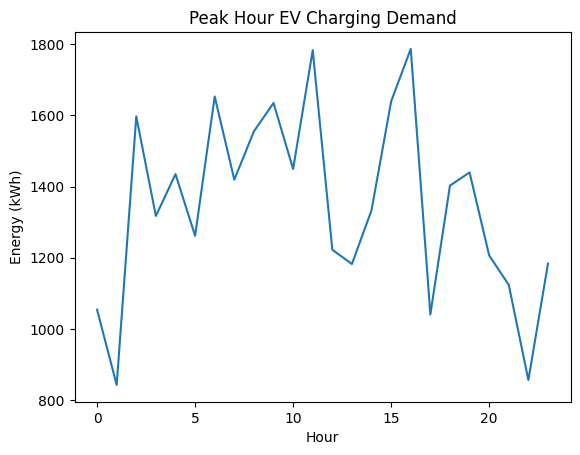

In [ ]:
import matplotlib.pyplot as plt

peak_hour.plot(kind='line')
plt.xlabel("Hour")
plt.ylabel("Energy (kWh)")
plt.title("Peak Hour EV Charging Demand")
plt.show()


In [ ]:
df.to_csv("ev_cleaned_data.csv", index=False)
